# ANOVA de Dois Fatores

A ANOVA (Análise de Variância) de dois fatores é um método estatístico utilizado para examinar a influência de duas variáveis fatoriais (categorias) sobre uma variável dependente (contínua) e para entender se existe uma interação entre esses dois fatores.

#### Objetivos da ANOVA de Dois Fatores:
1. **Determinar se há uma diferença significativa entre as médias dos grupos definidos por cada fator.**
2. **Investigar se há uma interação entre os dois fatores que afetam a variável dependente.**

#### Componentes da ANOVA de Dois Fatores:
- **Fatores (Variables Categóricas)**: As duas variáveis independentes categóricas que estamos analisando. Por exemplo, `Fator1` e `Fator2`.
- **Níveis**: Os diferentes valores que cada fator pode assumir. Por exemplo, se `Fator1` é "Gênero" (com níveis "Masculino" e "Feminino") e `Fator2` é "Tratamento" (com níveis "A", "B" e "C").
- **Interação**: Verifica se a combinação dos níveis dos dois fatores tem um efeito adicional na variável dependente além dos efeitos individuais de cada fator.

#### Hipóteses da ANOVA de Dois Fatores:
1. **Hipótese Nula (H0)**: Não há diferença nas médias dos grupos para cada fator individualmente.

2. **Hipótese Alternativa (H1)**: Pelo menos um dos grupos é diferente ou há uma interação significativa.


In [1]:
!pip install pingouin

In [2]:
import pandas as pd
import pingouin as pg
import numpy as np

In [3]:
df = pd.read_csv("../data/anova2_1.csv")
df

,Gênero,Álcool,Memória,Grupo
0,Masculino,4C,20,F
1,Feminino,4C,50,C
2,Feminino,4C,55,C
3,Masculino,4C,30,F
4,Masculino,2C,85,E
5,Masculino,4C,30,F
6,Masculino,4C,30,F
7,Feminino,4C,65,C
8,Feminino,2C,70,B
9,Masculino,4C,35,F


In [4]:
# Agrupa o DataFrame pelas colunas "Gênero" e "Álcool"
# e calcula as estatísticas descritivas para a coluna "Memória"
df.groupby(["Gênero", "Álcool"])["Memória"].describe()


count    mean        std   min    25%   50%    75%   max
Gênero    Álcool                                                          
Feminino  0C        8.0  60.625   4.955156  55.0  58.75  60.0  61.25  70.0
          2C        8.0  62.500   6.546537  50.0  60.00  62.5  66.25  70.0
          4C        8.0  57.500   7.071068  50.0  53.75  55.0  61.25  70.0
Masculino 0C        8.0  66.875  10.329396  50.0  62.50  67.5  75.00  80.0
          2C        8.0  66.875  12.517844  45.0  60.00  67.5  72.50  85.0
          4C        8.0  35.625  10.835622  20.0  30.00  32.5  41.25  55.0

In [5]:
df.groupby(["Álcool"])["Memória"].describe()

,count,mean,std,min,25%,50%,75%,max
Álcool,,,,,,,,
0C,16.0,63.7500,8.465617,50.0,58.75,62.5,70.0,80.0
2C,16.0,64.6875,9.911063,45.0,60.00,65.0,70.0,85.0
4C,16.0,46.5625,14.343262,20.0,33.75,50.0,55.0,70.0


In [6]:
df.groupby(["Gênero"])["Memória"].describe()

,count,mean,std,min,25%,50%,75%,max
Gênero,,,,,,,,
Feminino,24.0,60.208333,6.338147,50.0,55.00,60.0,65.0,70.0
Masculino,24.0,56.458333,18.502595,20.0,43.75,60.0,70.0,85.0


In [7]:
from scipy.stats import bartlett

# Seleciona os dados da coluna "Memória" para cada grupo
A = df[df["Grupo"] == "A"]["Memória"]
B = df[df["Grupo"] == "B"]["Memória"]
C = df[df["Grupo"] == "C"]["Memória"]
D = df[df["Grupo"] == "D"]["Memória"]
E = df[df["Grupo"] == "E"]["Memória"]
F = df[df["Grupo"] == "F"]["Memória"]

# Realiza o teste de Bartlett para verificar a homogeneidade das variâncias
bartlett_result = bartlett(A, B, C, D, E, F)

# Exibe o resultado do teste de Bartlett
print(bartlett_result)


BartlettResult(statistic=np.float64(7.658783911857486), pvalue=np.float64(0.17607044846504985))



### Explicação do Teste de Bartlett

O teste de Bartlett é um teste estatístico usado para verificar se múltiplas amostras têm variâncias iguais. Esse teste é particularmente útil quando se trabalha com ANOVA ou outros métodos que assumem homogeneidade de variâncias (homoscedasticidade).

#### Passos do Teste de Bartlett:

1. **Hipóteses**:
   - **Hipótese Nula (H0)**: As variâncias das amostras são iguais.
   - **Hipótese Alternativa (H1)**: Pelo menos uma das variâncias das amostras é diferente.

2. **Cálculo do Teste**:
   - O teste de Bartlett calcula uma estatística de teste \( T \) que segue aproximadamente uma distribuição qui-quadrado (\(\chi^2\)).

3. **Resultado**:
   - O resultado inclui a estatística de teste \( T \) e o valor p.
   - Se o valor p for menor que o nível de significância escolhido (geralmente 0,05), rejeitamos a hipótese nula e concluímos que as variâncias não são iguais.

#### Interpretação do Resultado:

- **Estatística de Teste (T)**: Um valor maior indica uma maior evidência contra a hipótese nula.
- **Valor p**: Um valor p menor que 0,05 indica que há diferenças significativas nas variâncias das amostras.


p-valor maior que 0.05 - não rejeita hipótese nula
- Variâncias iguais

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Performing two-way ANOVA
model = ols('Memória ~ Álcool + Gênero + Álcool:Gênero', data=df).fit()

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Álcool,3332.291667,2.0,20.065412,7.649011e-07
Gênero,168.750000,1.0,2.032258,1.613818e-01
Álcool:Gênero,1978.125000,2.0,11.911290,7.986603e-05
Residual,3487.500000,42.0,NaN,NaN


H0: médias são iguais

Ha: médias são diferentes

- Gênero: Rejeitamos Ha -> médias são iguais
- Álcool: Rejeitamos H0 -> médias são diferentes
  - Pelo menos 1 diferente
- Álcool:Gênero: Rejeitamos H0 -> médias são diferentes
  - Pelo menos 1 diferente (das combinações)

## Post Hoc
Como variancias sao iguais, temos uma gama enorme de testes para usar. Aqui vou usar o teste Sidak. O teste de Sidak é um método estatístico usado para ajustar valores p em múltiplas comparações, controlando a taxa de erro do tipo I (falsos positivos). Esse teste é uma alternativa ao teste de Bonferroni e é especialmente útil quando se realiza múltiplas comparações de médias ou outros parâmetros.

Outras opções: LSD, Bonferroni, Ryan-Einot-Gabriel-Welsch , etc


In [9]:
pg.pairwise_ttests(dv='Memória', between=['Álcool', 'Gênero'],padjust = "sidak", data=df).round(3)

c:\Users\vanes\Documents\Vanessa_PED_EBA\github_EBA\aula-08-anova\.venv\lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,Álcool,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Álcool,-,0C,2C,False,True,-0.288,30.0,two-sided,0.776,0.989,sidak,0.347,-0.099
1,Álcool,-,0C,4C,False,True,4.128,30.0,two-sided,0.000,0.001,sidak,91.788,1.423
2,Álcool,-,2C,4C,False,True,4.158,30.0,two-sided,0.000,0.001,sidak,98.538,1.433
3,Gênero,-,Feminino,Masculino,False,True,0.939,46.0,two-sided,0.352,NaN,NaN,0.412,0.267
4,Álcool * Gênero,0C,Feminino,Masculino,False,True,-1.543,14.0,two-sided,0.145,0.375,sidak,0.921,-0.729
5,Álcool * Gênero,2C,Feminino,Masculino,False,True,-0.876,14.0,two-sided,0.396,0.779,sidak,0.553,-0.414
6,Álcool * Gênero,4C,Feminino,Masculino,False,True,4.782,14.0,two-sided,0.000,0.001,sidak,78.256,2.261


**Olhar o p-corr**

**Álcool**

- 2C-4C: PVALOR = 0.001 -> 2 canecas é diferente de 4 canecas
- 0C-4C: PVALOR = 0.001 -> nenhuma caneca é diferente de 4 canecas

**Gênero**

São só 2 categorias -> olhar tabela anterior

**Álcool * Gênero**

Quem não injeriu alcool

- p-valor = 0.375 - não existe diferença de gênero

Quem não injeriu 2 canecas

- p-valor = 0.779 - não existe diferença de gênero

Quem não injeriu 4 canecas

- p-valor = 0.001 - existe diferença de gênero

Pelas médias (primeira tabela) homens que tomam 4 canecas tem media menor do que mulheres que tomam 4 canecas

In [10]:
pg.pairwise_ttests(dv='Memória', between=['Gênero', 'Álcool'],padjust = "sidak", data=df).round(3)

c:\Users\vanes\Documents\Vanessa_PED_EBA\github_EBA\aula-08-anova\.venv\lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,Gênero,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Gênero,-,Feminino,Masculino,False,True,0.939,46.0,two-sided,0.352,NaN,NaN,0.412,0.267
1,Álcool,-,0C,2C,False,True,-0.288,30.0,two-sided,0.776,0.989,sidak,0.347,-0.099
2,Álcool,-,0C,4C,False,True,4.128,30.0,two-sided,0.000,0.001,sidak,91.788,1.423
3,Álcool,-,2C,4C,False,True,4.158,30.0,two-sided,0.000,0.001,sidak,98.538,1.433
4,Gênero * Álcool,Feminino,0C,2C,False,True,-0.646,14.0,two-sided,0.529,0.989,sidak,0.492,-0.305
5,Gênero * Álcool,Feminino,0C,4C,False,True,1.024,14.0,two-sided,0.323,0.904,sidak,0.606,0.484
6,Gênero * Álcool,Feminino,2C,4C,False,True,1.468,14.0,two-sided,0.164,0.659,sidak,0.859,0.694
7,Gênero * Álcool,Masculino,0C,2C,False,True,0.000,14.0,two-sided,1.000,1.000,sidak,0.428,0.000
8,Gênero * Álcool,Masculino,0C,4C,False,True,5.904,14.0,two-sided,0.000,0.000,sidak,422.812,2.791
9,Gênero * Álcool,Masculino,2C,4C,False,True,5.339,14.0,two-sided,0.000,0.001,sidak,182.256,2.524


**Gênero * Álcool**

Mulheres
- Não há diferença no consumo de álcool na memória (p>0.05)

Homens
- Há diferença entre 2 e 4 canecas
- Há diferença entre 0 e 4 canecas

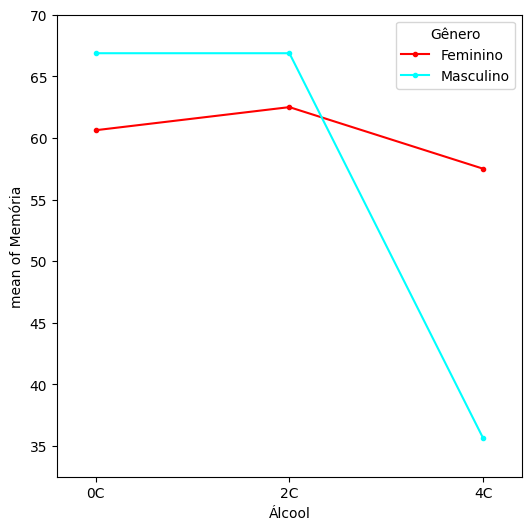

In [11]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=df["Álcool"],
    trace=df["Gênero"],
    response=df["Memória"], #sempre a variável dependente
    ax=ax
)

É muito comum gráficos de interação em que as linhas se cruzam, a interação ser significativa

# Excel

https://www.real-statistics.com/two-way-anova/real-statistics-support-for-two-factor-anova/

- ANOVA 2 fatores com replicação: Há mais de 1 amostra para cada combinação de nominais

- ANOVA 2 fatores sem replicação: Há somente 1 amostra para cada combinação de nominais

In [12]:
df.groupby(["Gênero", "Álcool"])["Memória"].count()

Gênero     Álcool
Feminino   0C        8
           2C        8
           4C        8
Masculino  0C        8
           2C        8
           4C        8
Name: Memória, dtype: int64

Nosso caso é um caso com replicação!


### Sumário e Código para ANOVA de Dois Fatores

#### 1. Importação de Bibliotecas
```python
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
```

#### 2. Preparação dos Dados
Certifique-se de que seus dados estejam em um DataFrame `df` com as colunas apropriadas. Suponha que temos duas variáveis fatoriais, `Fator1` e `Fator2`, e uma variável dependente `Resposta`.

```python
# Exemplo de criação de um DataFrame de exemplo
data = {
    'Fator1': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Fator2': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Resposta': [23, 45, 34, 44, 22, 38]
}
df = pd.DataFrame(data)
```

#### 3. Formulação do Modelo
Formule o modelo linear para a ANOVA de dois fatores usando a fórmula `Resposta ~ C(Fator1) + C(Fator2) + C(Fator1):C(Fator2)`.

```python
# Formulação do modelo
model = ols('Resposta ~ C(Fator1) + C(Fator2) + C(Fator1):C(Fator2)', data=df).fit()
```

#### 4. Realização da ANOVA
Use a função `anova_lm` do `statsmodels` para realizar a ANOVA.

```python
# Realização da ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
```

#### 5. Exibição dos Resultados
Exiba a tabela ANOVA para interpretar os resultados.

```python
# Exibição dos resultados
print(anova_table)
```

